In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bug_df = pd.read_csv('My_Requests_13_12_2022_11_24.csv', index_col='Key', parse_dates=['Created', 'Updated'])
bug_df['Created'] = bug_df['Created'].dt.date
bug_df['Updated'] = bug_df['Updated'].dt.date
bug_df = bug_df.sort_values(by=('Priority'), ascending=True)

In [33]:
#bug_df.head()

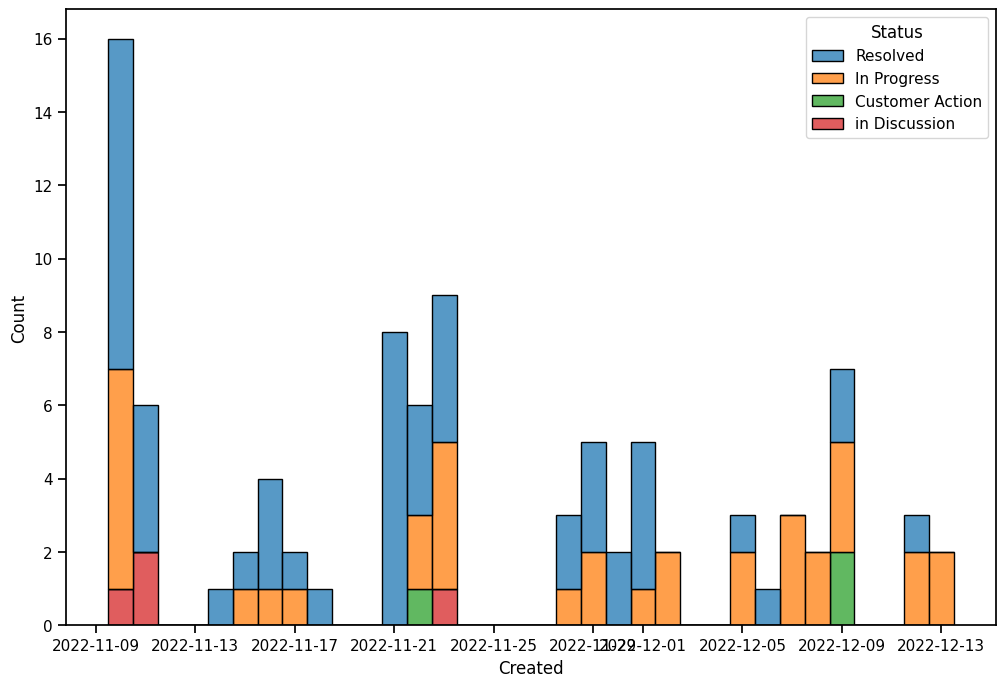

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
palette = {'NaN':'tab:red', 'Fixed':'tab:orange'}
#palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
sns.set_context('notebook')
sns.histplot(data=bug_df, x='Created', hue='Status', multiple='stack')
plt.savefig(fname='count_of_bugs_creation_date')

Plot for Count of Bugs by Creation Date

In [35]:
today = pd.to_datetime('today').date()
bug_df['Aging'] = today - bug_df['Created']
#print(bug_df)
bug_df_aging = bug_df
bug_df_aging = bug_df_aging.sort_values(by='Aging', ascending=False)
bug_df_aging.to_excel(excel_writer='bugs_aging.xlsx')
bug_df_aging.to_csv('bugs_aging.csv')

Count by Priority

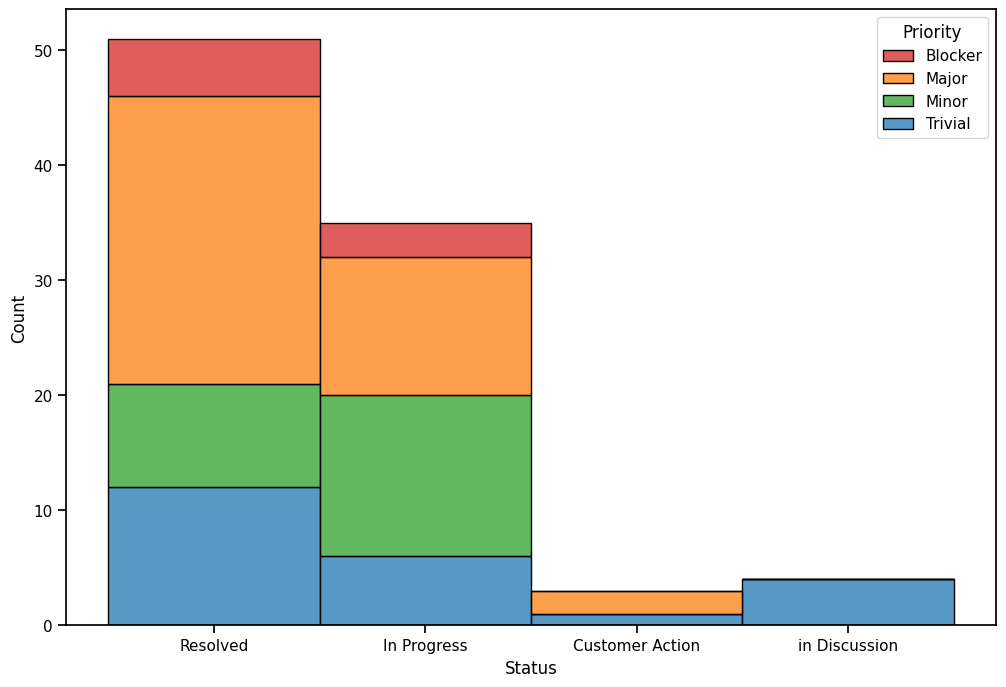

In [36]:
bug_df_aging = bug_df_aging.sort_values(by='Priority', ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
palette = {'Blocker':'tab:red', 'Major':'tab:orange', 'Minor':'tab:green', 'Trivial':'tab:blue'}
sns.set_context('notebook')
sns.histplot(data=bug_df_aging, x='Status', hue='Priority', multiple='stack', palette=palette)
plt.savefig(fname='Count_By_Status')

In [37]:
bug_df_count = bug_df.groupby('Created').count()
bug_df_count['Adj_Sum'] = bug_df_count['Type'] - bug_df_count['Resolution']
bug_df_cumsum = bug_df_count.cumsum() 
#bug_df_count.head()
#bug_df_cumsum.head()


In [38]:

bug_df_count_upd = bug_df.groupby('Updated').count()
bug_df_count_upd['Res_Sum'] = bug_df_count_upd['Resolution']
bug_df_cumsum_res = bug_df_count_upd.cumsum()
#bug_df_cumsum_res.head(10)


In [39]:
bug_df_cumsum_res_new_df = bug_df_cumsum_res.to_csv('test_csv.csv')
bug_df_cumsum_res_new_df = pd.read_csv('test_csv.csv')
#bug_df_cumsum_res_new_df.head()

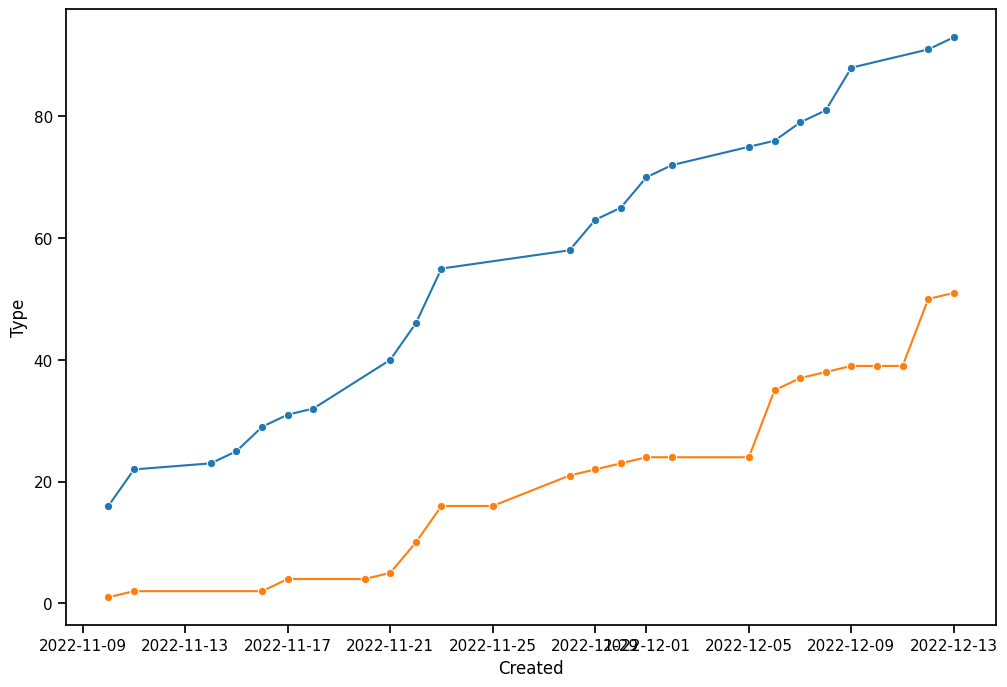

In [40]:

fig, ax = plt.subplots(figsize=(12,8))
#palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
sns.set_context('notebook')
sns.lineplot(data=bug_df_cumsum, x='Created', y='Type', marker='o', legend='auto')
#sns.lineplot(data=bug_df_cumsum, x='Created', y='Adj_Sum', marker='o', legend='auto')
sns.lineplot(data=bug_df_cumsum_res, x='Updated', y='Res_Sum', marker='o', legend='auto')
#plt.legend(labels=["CumSum of Bugs", "CumSum of Resolved Bugs"])
plt.savefig(fname='Cumsum_Total_vs_Resolved')

Cumulative Sum of Total Bugs (Adjusted for Resolved bugs) and Cumulative Sum of Resolved Bugs